In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option("display.max_columns", None)
plt.style.use('seaborn-v0_8')
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titlesize"] = 25
plt.rcParams["axes.titleweight"] = 'bold'
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 15
plt.rcParams["legend.title_fontsize"] = 15

In [3]:
data_path = r"D:\RideWise-Predicting-Bike-sharing-Demand\Data\preprocessed_day.csv"
df = pd.read_csv(data_path, encoding= 'unicode_escape')

# Lasso

In [4]:
df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,weekend,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,0,0.344167,0.805833,0.160446,985,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False
1,0,0,0,0.363478,0.696087,0.248539,801,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,0,0,1,0.196364,0.437273,0.248309,1349,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
3,0,0,1,0.200000,0.590435,0.160296,1562,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,0,0,1,0.226957,0.436957,0.186900,1600,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [6]:
# Creating a dependent variable for rented bike count
dependent_variable = 'cnt'

In [7]:
# Create a list of independent variables
independent_variables = list(set(df.columns.tolist()) - {dependent_variable})
independent_variables

['windspeed',
 'weekday_2',
 'mnth_5',
 'mnth_11',
 'mnth_6',
 'workingday',
 'season_4',
 'holiday',
 'mnth_10',
 'weekday_6',
 'mnth_4',
 'weekday_1',
 'weathersit_2',
 'weathersit_3',
 'mnth_2',
 'weekday_3',
 'season_2',
 'mnth_12',
 'weekday_4',
 'season_3',
 'hum',
 'temp',
 'mnth_7',
 'mnth_8',
 'weekday_5',
 'mnth_3',
 'weekend',
 'mnth_9',
 'yr']

In [8]:
# Create the dependent variable data
y = np.sqrt(df['cnt'])

# Create the data of independent variables
X = df.drop('cnt',axis=1)

In [9]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [10]:
X_train[0:10]

,yr,holiday,workingday,temp,hum,windspeed,weekend,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
97,0,0,1,0.335833,0.836250,0.226992,0,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False
503,1,0,1,0.564167,0.523333,0.136817,0,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
642,1,0,1,0.657500,0.722917,0.117546,0,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False
498,1,0,0,0.612500,0.576250,0.225117,1,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
303,0,0,1,0.340000,0.703333,0.106350,0,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False
570,1,0,1,0.750833,0.655000,0.211454,0,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False
250,0,0,1,0.633913,0.939565,0.192748,0,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True
17,0,0,1,0.216667,0.861667,0.146775,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False
595,1,0,0,0.678333,0.603333,0.177867,1,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False
240,0,0,1,0.636667,0.554583,0.159825,0,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False


In [11]:
from sklearn.preprocessing import MinMaxScaler


num_cols = ['temp','hum', 'windspeed']
scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [12]:

import joblib
import os

# Path to your existing folder
folder_path = "D:\RideWise-Predicting-Bike-sharing-Demand\Modeling\Saved_Models_files"   # <-- change if needed

# Make sure the folder exists (does NOT create a new one if already exists)
os.makedirs(folder_path, exist_ok=True)

# Full path of the scaler file
scaler_path = os.path.join(folder_path, "scaler.pkl")

# Save scaler
joblib.dump(scaler, scaler_path)

print(f"Scaler saved at: {scaler_path}")


Scaler saved at: D:\RideWise-Predicting-Bike-sharing-Demand\Modeling\Saved_Models_files\scaler.pkl


In [13]:



# Fit on train numeric columns
X_train = scaler.fit_transform(X_train)

# Transform test numeric columns
X_test = scaler.transform(X_test)



In [14]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(584, 29)
(584,)
(147, 29)
(147,)


In [15]:
X_train[0:10]

array([[0.        , 0.        , 1.        , 0.35024023, 0.80442593,
        0.48605788, 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 1.        , 0.        ],
       [1.        , 0.        , 1.        , 0.63925722, 0.35526299,
        0.24873701, 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        ],
       [1.        , 0.        , 1.        , 0.75739478, 0.64174706,
        0.19801995, 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
  

In [16]:
lasso_reg = Lasso(alpha = 0.01)
lasso_reg.fit(X_train,y_train)

import joblib

joblib.dump(lasso_reg, "lasso_model.pkl")

print("[INFO] Lasso model saved successfully!")


[INFO] Lasso model saved successfully!


In [17]:
lasso_reg.coef_

array([ 14.2367416 ,  -2.11475151,   1.90239976,  35.43318986,
       -11.13176573,  -9.4936019 ,  -0.        ,   7.44568461,
         7.35064575,  13.32707373,   1.31729688,   4.32419655,
         1.90649382,   4.3293708 ,   0.        ,  -3.49319389,
        -0.        ,   5.02293863,   2.01891799,  -0.26452341,
         0.        ,  -0.81921856,   0.        ,  -0.13156067,
         0.28799874,   0.74399325,   2.03458799,  -2.36055986,
       -18.83531708])

In [18]:
pd.DataFrame(lasso_reg.coef_,X.columns,columns=['Coeficients'])

,Coeficients
yr,14.236742
holiday,-2.114752
workingday,1.902400
temp,35.433190
hum,-11.131766
windspeed,-9.493602
weekend,-0.000000
season_2,7.445685
season_3,7.350646
season_4,13.327074


In [19]:
lasso_reg.intercept_

np.float64(39.35385978076246)

In [20]:
lasso_reg.score(X_train,y_train)

0.8395415794721092

In [21]:
y_pred_train = lasso_reg.predict(X_train)
y_pred = lasso_reg.predict(X_test)

In [22]:
MAE= mean_absolute_error(y_test,y_pred)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

MSE=mean_squared_error(y_test,y_pred)
print(f" The Mean Squred Error(MSE) is {MSE}.")

RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

R2=r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

adj_r2 = 1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print(f"Adjusted R2 is {adj_r2}.")

 The Mean Absolute Error (MAE) is 4.84719255554709.
 The Mean Squred Error(MSE) is 40.35368634033176.
The Root Mean Squared Error(RMSE) is 6.352455142724879.
The R2 Score is 0.8579376097205469.
Adjusted R2 is 0.8227255642666653.


In [23]:
test_dict = {'Model':"Lasso",
              'MAE':round(MAE,4),
              'MSE':round(MSE,4),
              'RMSE':round(RMSE,4),
              'R2_score':round(R2,4),
              'Adjusted_R2':round(adj_r2,4)}

In [24]:
test_results_df = pd.DataFrame(test_dict,index=[0])
test_results_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted_R2
0,Lasso,4.8472,40.3537,6.3525,0.8579,0.8227


In [25]:
lasso_rg = Ridge()

alphas = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}

lasso_linear_reg = GridSearchCV(lasso_rg, alphas, scoring='neg_mean_squared_error', cv=4)
 
lasso_linear_reg.fit(X_train, y_train)

import joblib

joblib.dump(lasso_linear_reg, "lasso_model(CV).pkl")

print("[INFO] Lasso(CV) model saved successfully!")


[INFO] Lasso(CV) model saved successfully!


In [26]:
print(f'The best alpha value is {lasso_linear_reg.best_params_}')
print(f'The best negative mean squred error value is {lasso_linear_reg.best_score_}')

The best alpha value is {'alpha': 0.1}
The best negative mean squred error value is -45.76583535585675


In [27]:
def plot_Pred_vs_actual(y_pred_test,y_test):
  ''' 
  Visualize predicted values with actual values.
  '''
  plt.figure(figsize=(20,8))
  plt.plot(y_pred_test)
  plt.plot(np.array(y_test))
  plt.legend(["Predicted","Actual"],)
  plt.title("Predicted V/S Actual")
  plt.show()

In [28]:
def plot_scatter(y_pred_test,y_test):
  '''
  Plot scatter plot for y_test values and y_test values. To check how close we are to regresson line
  '''
  plt.figure(figsize=(16,5))
  sns.regplot(x = y_test,y = y_pred_test, line_kws={'color':'red'})
  plt.xlabel('Actual')
  plt.ylabel("Predicted")
  plt.title("Actual v/s Predicted")

In [29]:
def Residual_distPlot(y_pred_test,y_test):  
  '''
  Checks the distribution of residals
  '''        
                                                    
  plt.figure(figsize=(10,5))
  sns.distplot(x = y_test-y_pred_test)
  plt.title("Residual Distribution")

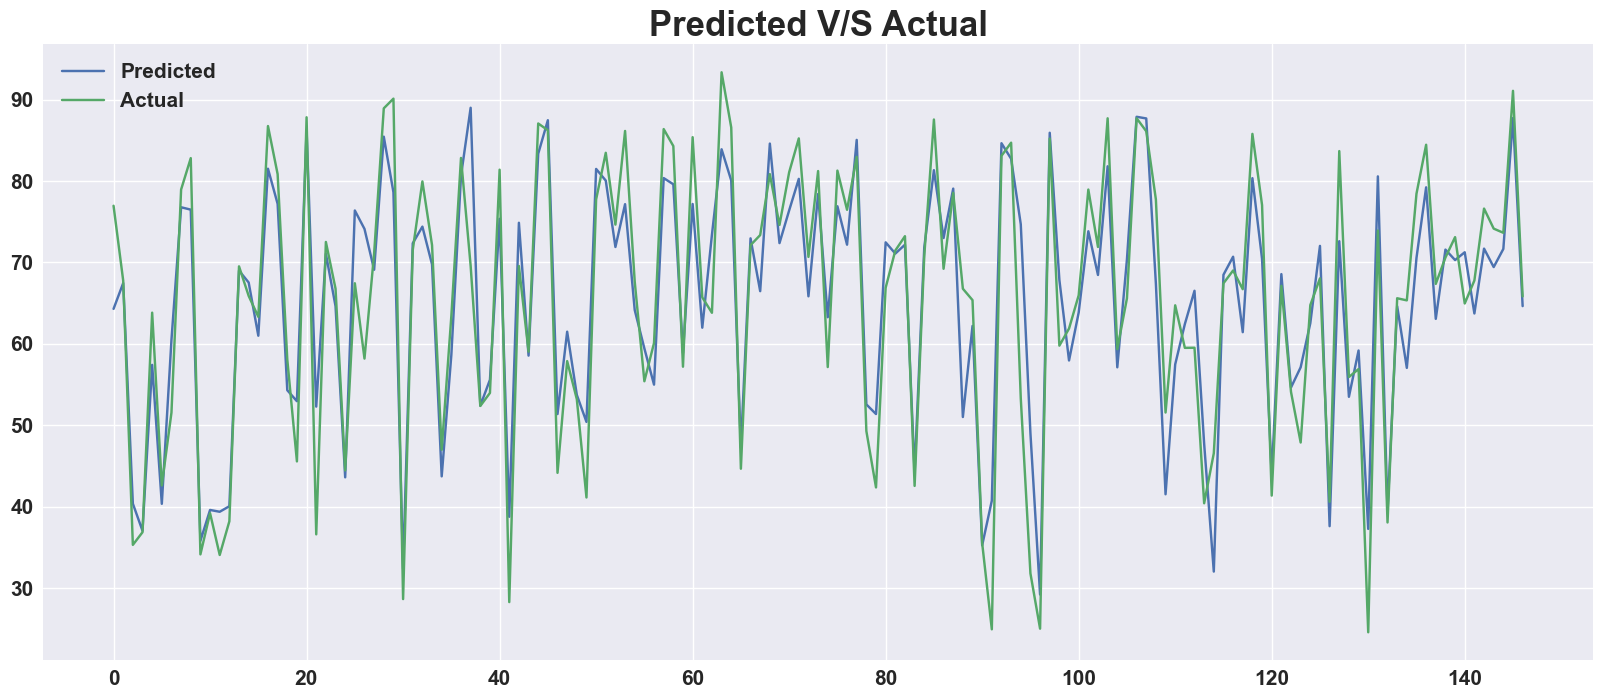

In [30]:
plot_Pred_vs_actual(y_pred,y_test)

Text(0.5, 0, 'y_predicted')

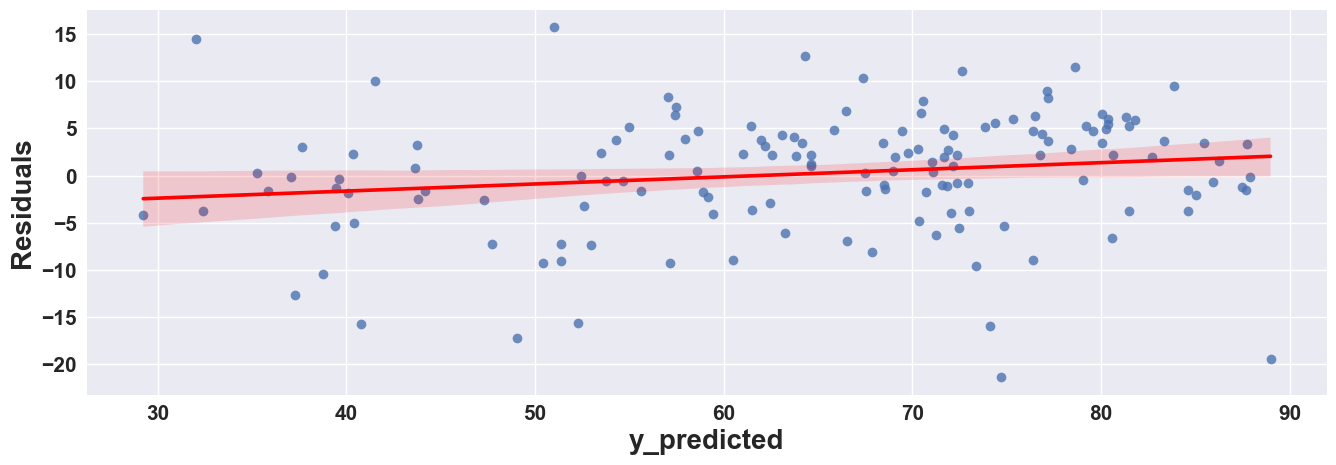

In [31]:
plt.figure(figsize=(16,5))
sns.regplot(x = y_pred,y = y_test-y_pred,line_kws={'color':'red'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

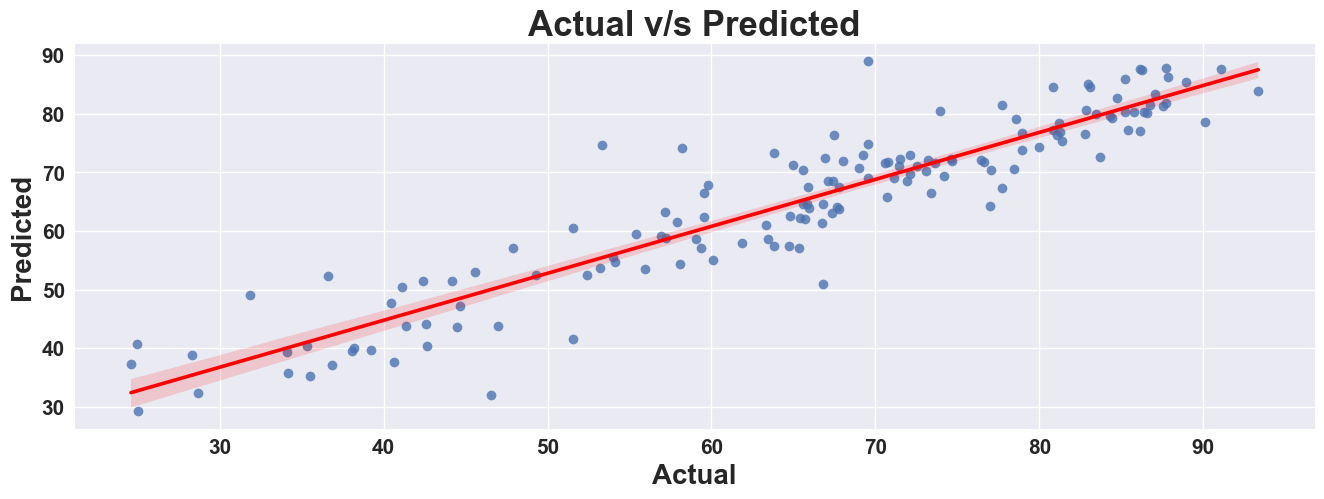

In [32]:
plot_scatter(y_pred,y_test)

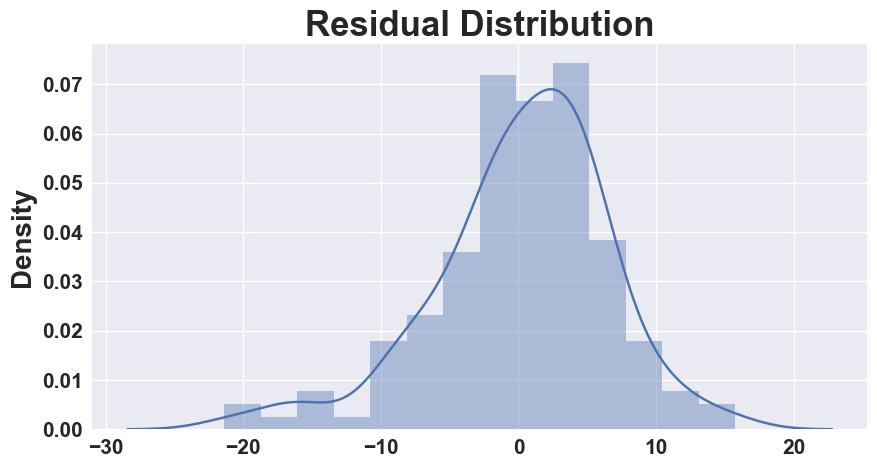

In [33]:
Residual_distPlot(y_pred,y_test)

# Ridge

In [34]:
# Initiating
ridge_reg = Ridge(alpha = 0.01)

In [35]:
# Fitting and training the model
ridge_reg.fit(X_train,y_train)

,alpha,0.01
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [36]:
import joblib

joblib.dump(ridge_reg, "ridge_model.pkl")

print("[INFO] Ridge model saved successfully!")

[INFO] Ridge model saved successfully!


In [37]:
# Check coefficient
ridge_reg.coef_

array([ 14.24981942,  -2.2117774 ,   2.12948844,  35.19721795,
       -11.47767972,  -9.82033978,   0.08228896,   7.29695112,
         7.83955261,  13.75215635,   1.97682297,   5.03227321,
         2.796919  ,   5.22338869,   0.55799303,  -3.47263334,
         0.1065834 ,   5.34116922,   2.33438839,  -0.25472863,
         0.24843381,  -0.86669358,  -0.0422234 ,  -0.24169012,
         0.30728487,   0.76103327,   2.21064198,  -2.37846471,
       -19.05360982])

In [38]:
# get dataframe of x columns and Coeficients
pd.DataFrame(ridge_reg.coef_,X.columns,columns=['Coeficients'])

,Coeficients
yr,14.249819
holiday,-2.211777
workingday,2.129488
temp,35.197218
hum,-11.477680
windspeed,-9.820340
weekend,0.082289
season_2,7.296951
season_3,7.839553
season_4,13.752156


In [39]:
    # Check intercept
ridge_reg.intercept_

np.float64(39.02111982493426)

In [40]:
# Checking score
ridge_reg.score(X_train,y_train)

0.8397987909163694

In [41]:
# y predictions on training dataset
y_pred_train = ridge_reg.predict(X_train)
# y predictions on test dataset
y_pred = ridge_reg.predict(X_test)

In [42]:
# Evaluation of Test data set

#Calculate Mean Absolute Error.
MAE = mean_absolute_error(y_test,y_pred)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE = mean_squared_error(y_test,y_pred)
print(f" The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE = np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2 = r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

#Calculate adjusted R2 Score
adj_r2 = 1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print(f"Adjusted R2 is {adj_r2}.")

 The Mean Absolute Error (MAE) is 4.853703907304044.
 The Mean Squred Error(MSE) is 40.15109391028515.
The Root Mean Squared Error(RMSE) is 6.336489083892211.
The R2 Score is 0.8586508225017093.
Adjusted R2 is 0.8236155562841843.


In [43]:
test_dict = {'Model':"Ridge(GridsearchCv Tunned)",
              'MAE':round(MAE,4),
              'MSE':round(MSE,4),
              'RMSE':round(RMSE,4),
              'R2_score':round(R2,4),
              'Adjusted_R2':round(adj_r2,4)}

In [44]:
import pandas as pd

test_results_df = pd.concat([test_results_df, pd.DataFrame([test_dict])], ignore_index=True)

test_results_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted_R2
0,Lasso,4.8472,40.3537,6.3525,0.8579,0.8227
1,Ridge(GridsearchCv Tunned),4.8537,40.1511,6.3365,0.8587,0.8236


In [45]:
# cross validation on Ridge regression
# creating object
ridge_rg = Ridge()

# alphas values's dictionary to pass on in Gridsearchcv 
alphas = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}

ridge_linear_reg = GridSearchCV(ridge_rg, alphas, scoring='neg_mean_squared_error', cv=4)
# fitting model
ridge_linear_reg.fit(X_train, y_train)

,estimator,Ridge()
,param_grid,"{'alpha': [1e-15, 1e-13, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,4
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,0.1


In [46]:
import joblib

joblib.dump(ridge_linear_reg, "ridge_model(CV).pkl")

print("[INFO] Ridge(CV) saved successfully!")

[INFO] Ridge(CV) saved successfully!


In [47]:
# Since it showing best parameter alpha= 1.. alpha =1 means it will be as linear regression.
print(f'The best alpha value is {ridge_linear_reg.best_params_}')
print(f'The best negative mean squred error value is {ridge_linear_reg.best_score_}')

The best alpha value is {'alpha': 0.1}
The best negative mean squred error value is -45.76583535585675


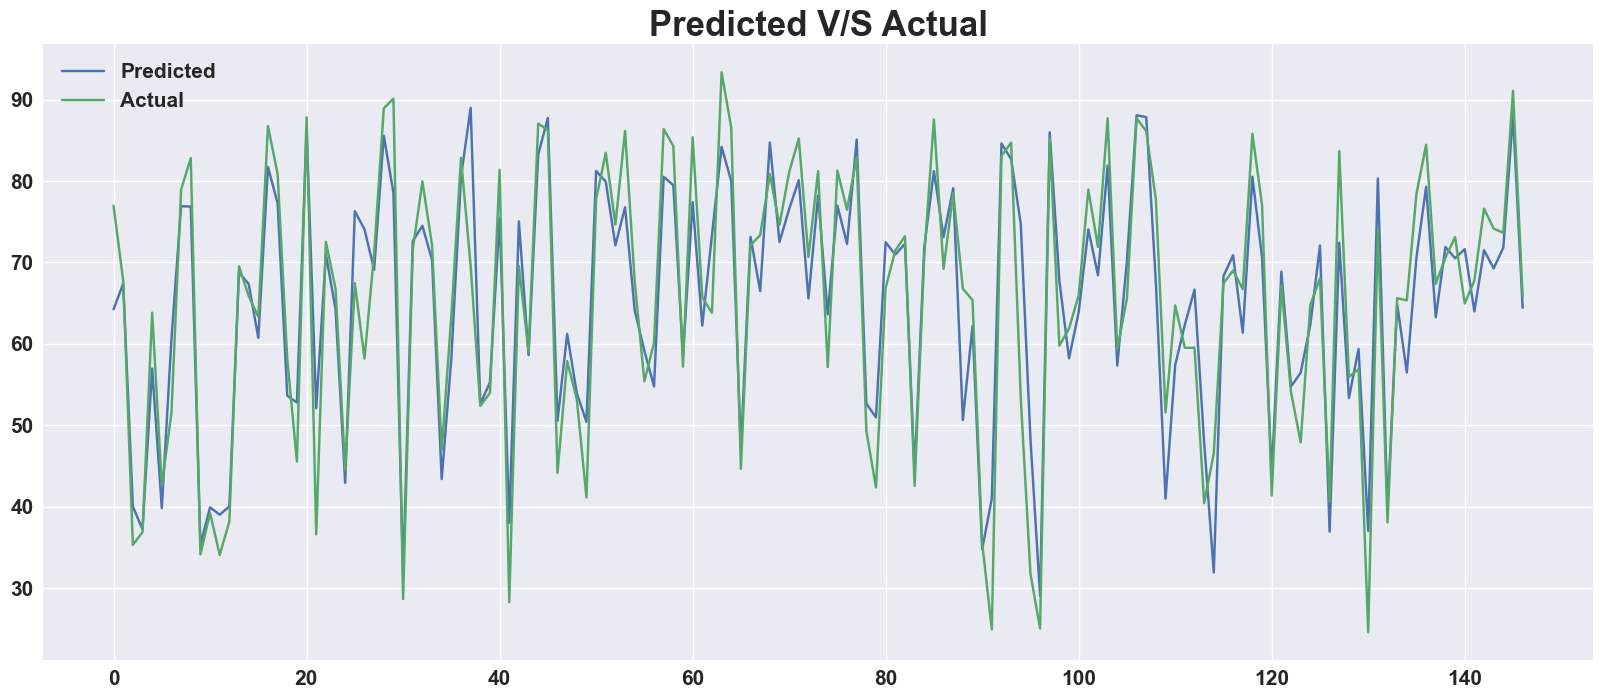

In [48]:
plot_Pred_vs_actual(y_pred,y_test)

Text(0.5, 0, 'y_predicted')

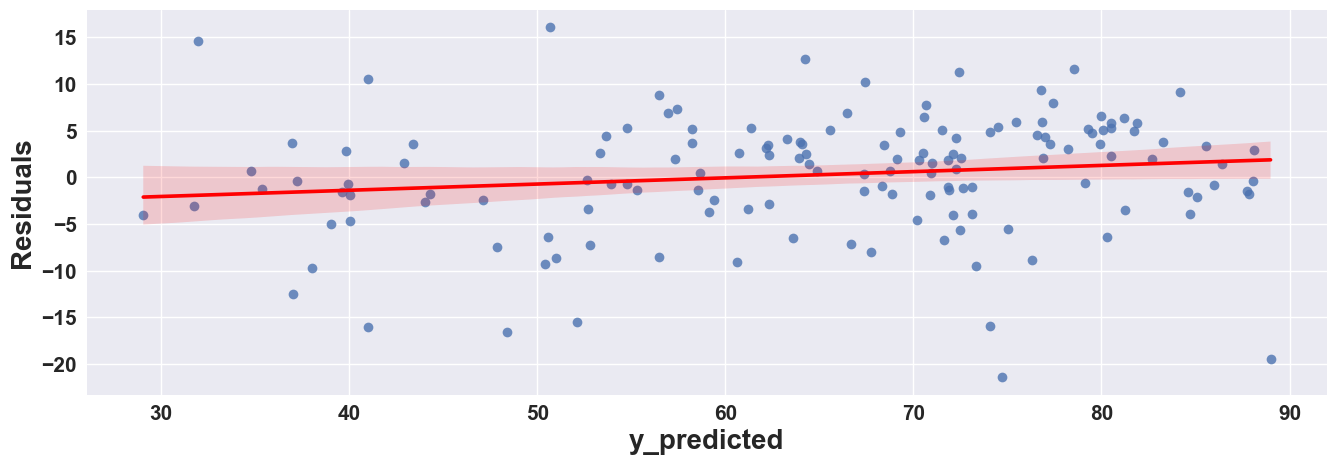

In [49]:
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred,y=y_test-y_pred,line_kws={'color':'red'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

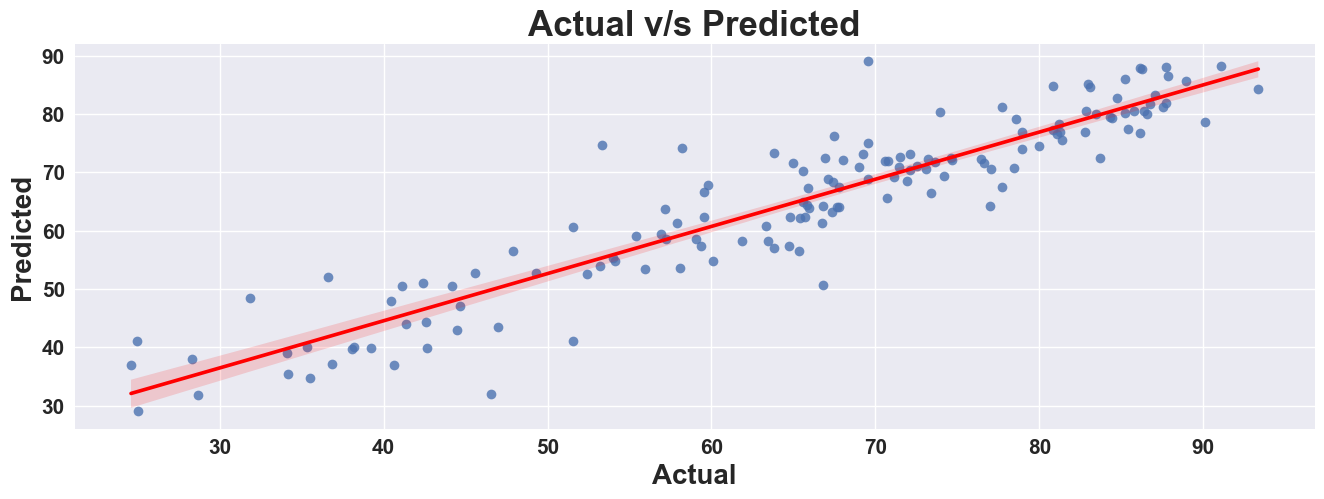

In [50]:
plot_scatter(y_pred,y_test)

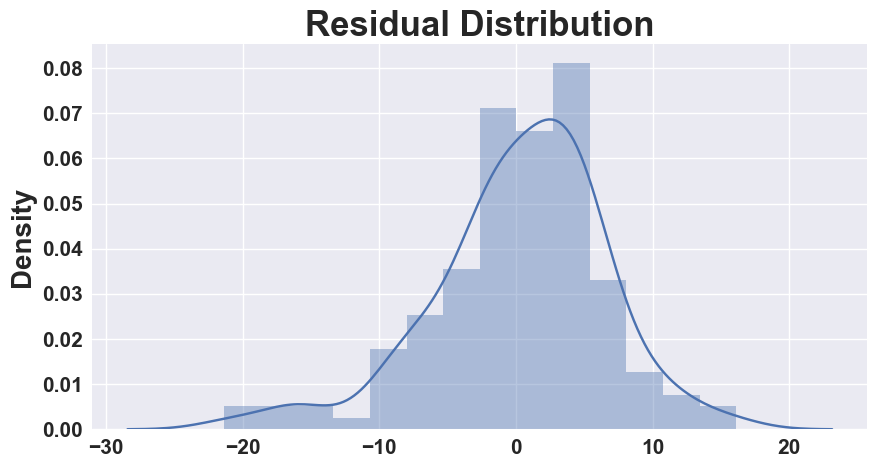

In [51]:
Residual_distPlot(y_pred,y_test)

# Elastic Net

In [52]:
elastic_net_reg = ElasticNet(alpha = 1e-05,l1_ratio = 0.3)
elastic_net_reg.fit(X_train,y_train)

,alpha,1e-05
,l1_ratio,0.3
,fit_intercept,True
,precompute,False
,max_iter,1000
,copy_X,True
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [53]:
elastic_net_reg.score(X_test,y_test)

0.8586201154249544

In [54]:
y_pred_train = elastic_net_reg.predict(X_train)
y_pred = elastic_net_reg.predict(X_test)

In [55]:
# check score on test data
elastic_net_reg.score(X_test,y_test)

0.8586201154249544

In [56]:
# Evaluation of Test data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

#Calculate adjusted R2 Score
adj_r2 = 1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print(f"Adjusted R2 is {adj_r2}.")

The Mean Absolute Error (MAE) is 4.854036630296367.
The Mean Squred Error(MSE) is 40.1598164422752.
The Root Mean Squared Error(RMSE) is 6.3371773245093275.
The R2 Score is 0.8586201154249544.
Adjusted R2 is 0.8235772380516525.


In [57]:
test_dict = {'Model':"ElasticNet(GridSearchCV-Tunned)",
              'MAE':round(MAE,4),
              'MSE':round(MSE,4),
              'RMSE':round(RMSE,4),
              'R2_score':round(R2,4),
              'Adjusted_R2':round(adj_r2,4)}

In [58]:
import pandas as pd

test_results_df = pd.concat([test_results_df, pd.DataFrame([test_dict])], ignore_index=True)

test_results_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted_R2
0,Lasso,4.8472,40.3537,6.3525,0.8579,0.8227
1,Ridge(GridsearchCv Tunned),4.8537,40.1511,6.3365,0.8587,0.8236
2,ElasticNet(GridSearchCV-Tunned),4.8540,40.1598,6.3372,0.8586,0.8236


In [59]:
elastic = ElasticNet()
alpha_l1 = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}
elastic_regressor = GridSearchCV(elastic, alpha_l1, scoring='neg_mean_squared_error',cv=4)
elastic_regressor.fit(X_train, y_train)

import joblib

joblib.dump(elastic_net_reg, "elastic_net_model.pkl")
joblib.dump(elastic_regressor, "elastic_net_model(CV).pkl")

print("[INFO] Elastic Net models saved successfully!")



[INFO] Elastic Net models saved successfully!


In [60]:
print(f'The best alpha value is {elastic_regressor.best_params_}')
print(f'The best negative mean squred error value is {elastic_regressor.best_score_}')

The best alpha value is {'alpha': 0.01, 'l1_ratio': 0.9}
The best negative mean squred error value is -45.64189753835571


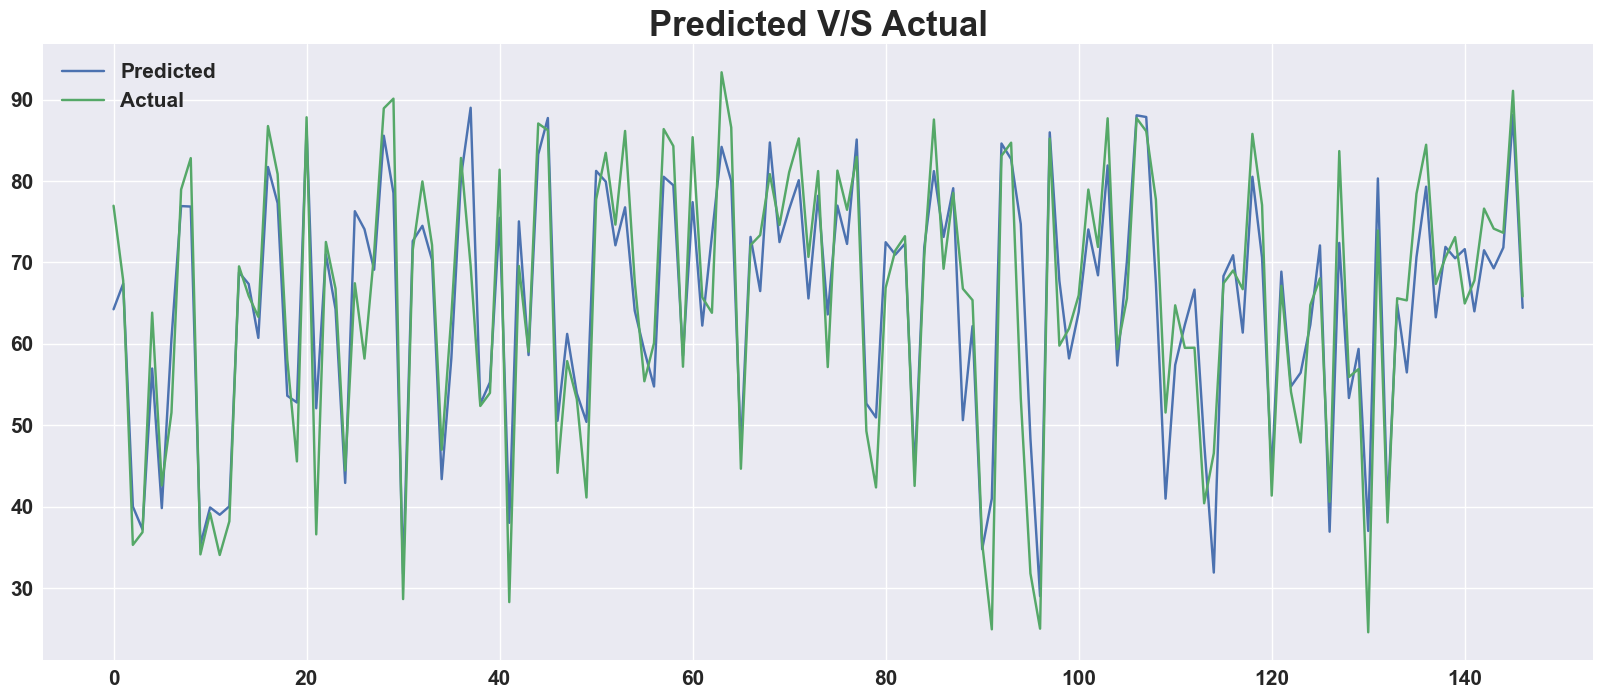

In [61]:
plot_Pred_vs_actual(y_pred,y_test)

Text(0.5, 0, 'y_predicted')

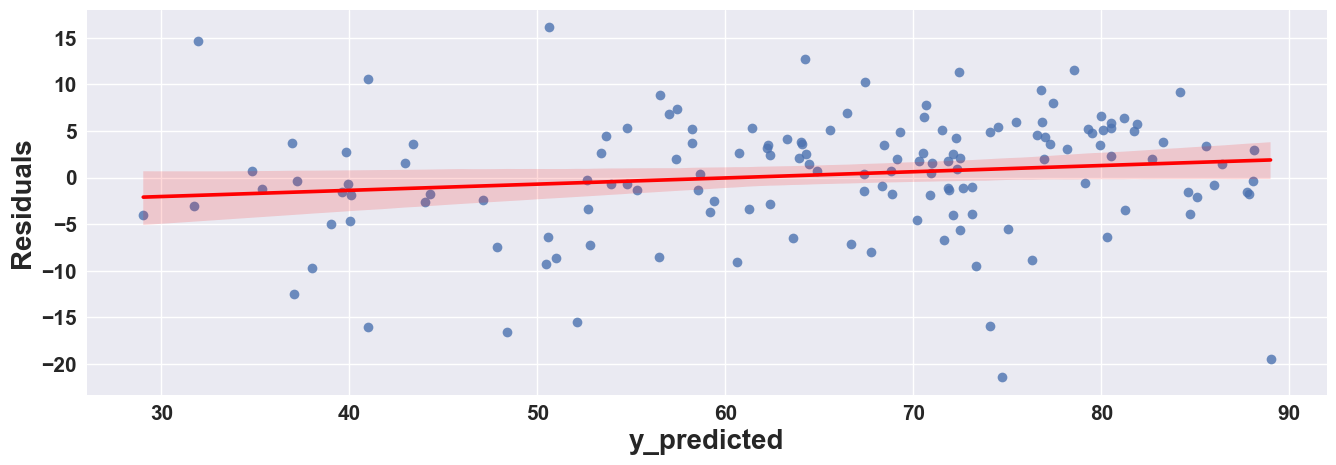

In [62]:
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred,y=y_test-y_pred,line_kws={'color':'red'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

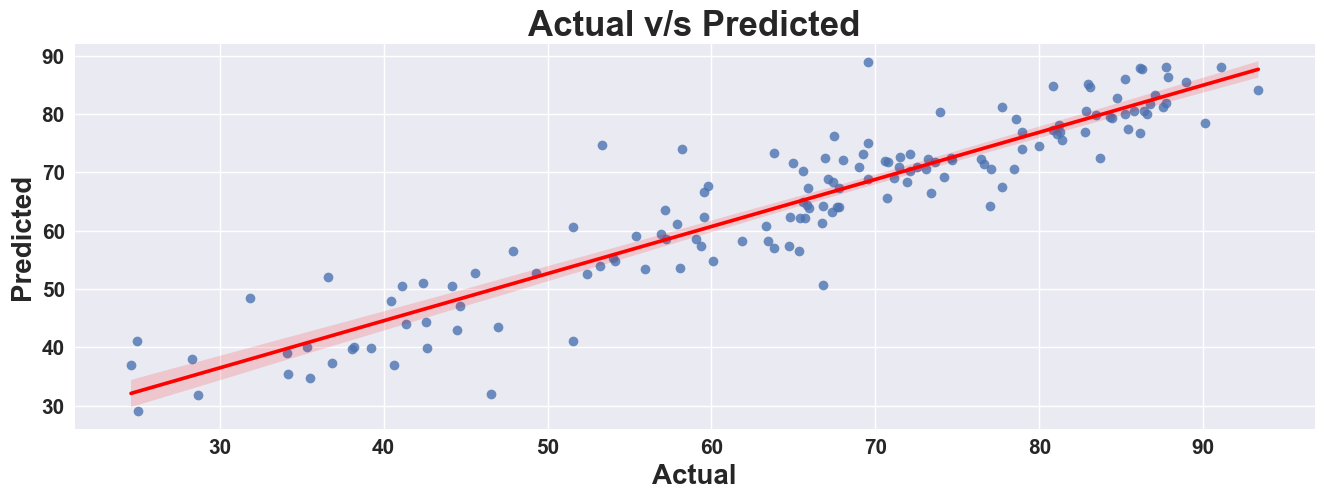

In [63]:
plot_scatter(y_pred,y_test)

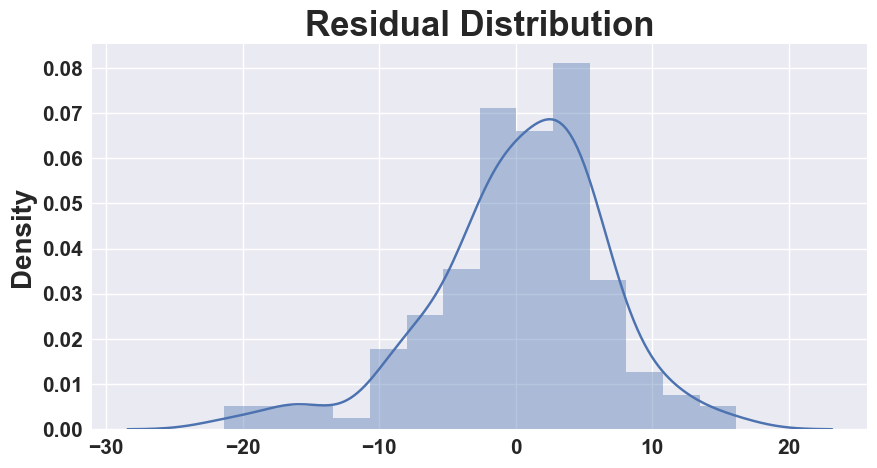

In [64]:
Residual_distPlot(y_pred,y_test)